In [1]:
from cgitb import text
from curses import KEY_ENTER
from pickletools import uint1
from xml.dom.minidom import Element
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

### 164期每周必看

In [9]:
browser=webdriver.Chrome()
browser.get('https://www.bilibili.com/v/popular/all?spm_id_from=333.1007.0.0')
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

windows=browser.window_handles 
browser.switch_to.window(windows[-1])
browser.execute_script('var q=document.documentElement.scrollTop=0')
button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
button_1.click()
time.sleep(2)
button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
button_2.click()
time.sleep(2)
button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[4]/p[1]') # 164期
button_3.click()

windows=browser.window_handles
browser.switch_to.window(windows[-1])
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

time.sleep(2)

fans = []
up = []
title_week = [] # 每周必看视频的标题



for i in range (1,43):
    try: 
        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
        title_week.append(elem_text.text)  # 将比视频标题放入列表

        elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
        up.append(elem_up.text)
        elem_up.click()  # 点击进入up主页面
        time.sleep(10)

        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')
        fans.append(elem_fans.text)
            
        browser.close()
        
    except Exception as e:
        pass
    continue

加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[4]/p[1]')


加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:44: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/1635375301.py:51: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')


In [40]:
list_target = []
for i in range(0,42):
    list_target.append([])
    list_target[i].append(title_week[i])
    list_target[i].append(up[i])
    list_target[i].append(fans[i])

list_target

[['为了体验下在太空里那种失重旋转的感觉自己做了辆失重离心车', '手工耿', '655.9万'],
 ['求求你别停产！这玩意我能吃一辈子！！', '大碗拿铁', '305万'],
 ['《本草纲目》，但是废话文学', '咆哮丶土拨鼠', '53.4万'],
 ['【我的世界 4K】一人，四年，十亿方块，一座华夏城', 'GNwork团队', '10万'],
 ['只要5分钟，请为你的妈妈看完这个视频吧', '二二酸酸', '163.9万'],
 ['“历史书太小 装不下一个人波澜壮阔的一生 历史书又太大 装下了华夏上下五千年 ”', '海棠家的大肥鱼', '53.6万'],
 ['华 妃 之 怒', '小芃路子野', '69.4万'],
 ['G2：打T1这事儿还得我来教你！', '怪盗配音', '56.9万'],
 ['掀开满层辣椒，终于明白，这玩意儿为啥能火爆夜宵街头了！', '盗月社食遇记', '684.2万'],
 ['⚡️第一次当妈，没啥经验⚡️', '城市里的动物', '3.9万'],
 ['东汉顶流格局有多大？【小约翰】', '小约翰可汗', '437.2万'],
 ['这绝对是你见过的最像费玉清版的爱情恰恰', '反白嫖艺术家', '12.3万'],
 ['今年23岁！我居然被迫剃了寸头！', '自来卷三木', '259.3万'],
 ['用【本草纲目】演奏【本草纲目】', '白林Bylin', '6.2万'],
 ['原来名校的答辩PPT长这样，怪不得导师要给满分！', 'PPT进化论', '17万'],
 ['全世界仅此一辆！用96天为我的宝贝造出一辆兰博基尼 Vision GT概念超跑', '越南木匠阿岛', '9.1万'],
 ['【洛天依AI】玫瑰与泪【ACE COVER】', 'Creuzer', '13.5万'],
 ['峡谷科目四世界纪录：5分4秒速杀小龙！自信即是巅峰！！', '布锅锅', '134.9万'],
 ['长视频来啦，在b站我还是个新手村的up主，非常感谢大家的认可和支持，我也会一如既往，继续坚持。', 'hello刘小备', '45.4万'],
 ['【颈椎自救】5个最舒服的康复动作，缓解肩颈疼痛僵硬！(坐姿版)', '郝强Fit', '13.2万'],
 ['一键蒸发7000血的套路！对手：我去！外挂！！！【有

In [41]:
with open('fans164.csv', 'w',encoding='utf_8_sig') as f:  
    writer = csv.writer(f)
    for row in list_target:
        writer.writerow(row)  # 将列表信息写如csv文档

In [44]:
browser=webdriver.Chrome()
browser.get('https://www.bilibili.com/v/popular/all?spm_id_from=333.1007.0.0')
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

windows=browser.window_handles 
browser.switch_to.window(windows[-1])
browser.execute_script('var q=document.documentElement.scrollTop=0')
button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
button_1.click()
time.sleep(2)
button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
button_2.click()
time.sleep(2)
button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[3]/p[1]')  # 165期
button_3.click()

windows=browser.window_handles
browser.switch_to.window(windows[-1])
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

time.sleep(2)

fans165 = []
up165 = []
title_week165 = [] # 每周必看视频的标题



for i in range (1,43):
    try: 
        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
        title_week165.append(elem_text.text)  # 将比视频标题放入列表

        elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
        up165.append(elem_up.text)
        elem_up.click()  # 点击进入up主页面
        time.sleep(10)

        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')
        fans165.append(elem_fans.text)
            
        browser.close()
        
    except Exception as e:
        pass
    continue

加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[3]/p[1]')  # 165期


加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:44: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3210003185.py:51: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')


In [47]:
list_target165 = []
for i in range(0,42):
    list_target165.append([])
    list_target165[i].append(title_week165[i])
    list_target165[i].append(up165[i])
    list_target165[i].append(fans165[i])

with open('fans165.csv', 'w',encoding='utf_8_sig') as f:  
    writer = csv.writer(f)
    for row in list_target165:
        writer.writerow(row)  # 将列表信息写如csv文档

### 166期每周必看

In [48]:
browser=webdriver.Chrome()
browser.get('https://www.bilibili.com/v/popular/all?spm_id_from=333.1007.0.0')
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

windows=browser.window_handles 
browser.switch_to.window(windows[-1])
browser.execute_script('var q=document.documentElement.scrollTop=0')
button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
button_1.click()
time.sleep(2)
button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
button_2.click()
time.sleep(2)
button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[2]/p[1]')  # 166期
button_3.click()

windows=browser.window_handles
browser.switch_to.window(windows[-1])
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

time.sleep(2)

fans166 = []
up166 = []
title_week166 = [] # 每周必看视频的标题



for i in range (1,43):
    try: 
        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
        title_week166.append(elem_text.text)  # 将比视频标题放入列表

        elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
        up166.append(elem_up.text)
        elem_up.click()  # 点击进入up主页面
        time.sleep(10)

        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')
        fans166.append(elem_fans.text)
            
        browser.close()
        
    except Exception as e:
        pass
    continue

加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[2]/p[1]')  # 166期


加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:44: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/2638373470.py:51: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')


In [50]:
list_target166 = []
for i in range(0,42):
    list_target166.append([])
    list_target166[i].append(title_week166[i])
    list_target166[i].append(up166[i])
    list_target166[i].append(fans166[i])

with open('fans166.csv', 'w',encoding='utf_8_sig') as f:  
    writer = csv.writer(f)
    for row in list_target166:
        writer.writerow(row)  # 将列表信息写如csv文档

### 167期每周必看

In [55]:
browser=webdriver.Chrome()
browser.get('https://www.bilibili.com/v/popular/all?spm_id_from=333.1007.0.0')
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

windows=browser.window_handles 
browser.switch_to.window(windows[-1])
browser.execute_script('var q=document.documentElement.scrollTop=0')
button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
button_1.click()
time.sleep(2)
button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
button_2.click()
time.sleep(2)
button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[1]/p[1]')  # 167期
button_3.click()

windows=browser.window_handles
browser.switch_to.window(windows[-1])
try:
    wait=WebDriverWait(browser,100)
    element=wait.until(EC.presence_of_all_elements_located)
finally:
    print('加载完成')

time.sleep(2)

fans167 = []
up167 = []
title_week167 = [] # 每周必看视频的标题



for i in range (1,43):
    try: 
        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
        title_week167.append(elem_text.text)  # 将比视频标题放入列表

        elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
        up167.append(elem_up.text)
        elem_up.click()  # 点击进入up主页面
        time.sleep(10)

        windows=browser.window_handles
        browser.switch_to.window(windows[-1])
        elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')
        fans167.append(elem_fans.text)
            
        browser.close()
        
    except Exception as e:
        pass
    continue

加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_1=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/span') # 每周必看
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_2=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/span')
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  button_3=browser.find_element_by_xpath('//*[@id="app"]/div/div[2]/div[1]/div[1]/div/div[1]/p[1]')  # 167期


加载完成


/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_text=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/p')  # 视频标题
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:44: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_up=browser.find_element_by_xpath(f'//*[@id="app"]/div/div[2]/div[2]/div/div[{i}]/div[2]/div/span[1]/span')  # UP主页面
/var/folders/jn/tbw_ghm91nzfy0y5zz9n5xcc0000gn/T/ipykernel_82093/3459330528.py:51: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem_fans=browser.find_element_by_xpath(f'//*[@id="n-fs"]')


In [57]:
list_target167 = []
for i in range(0,34):
    list_target167.append([])
    list_target167[i].append(title_week167[i])
    list_target167[i].append(up167[i])
    list_target167[i].append(fans167[i])

with open('fans167.csv', 'w',encoding='utf_8_sig') as f:  
    writer = csv.writer(f)
    for row in list_target167:
        writer.writerow(row)  # 将列表信息写如csv文档

### 读取csv文档 进行统计

## 164期

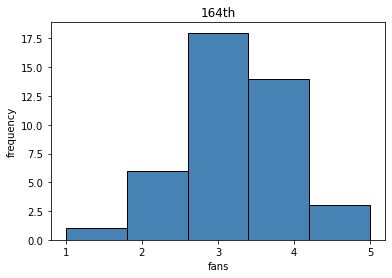

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('fans164.csv',names=['标题','up主','粉丝数'])  # 164期

title_week = data['标题']
fans = data['粉丝数']

for i in range(0,42):
    if '万' in fans[i]:
        fans[i] = float(fans[i].strip('万'))
    else:
        fans[i] = float(fans[i])/10000

for j in range(0,42):
    if fans[j]<=1:
        fans[j]=1
    if 1<fans[j]<=10:
        fans[j]=2
    if 10<fans[j]<=100:
        fans[j]=3
    if 100<fans[j]<=500:
        fans[j]=4
    if fans[j]>500:
        fans[j]=5

# 绘制直方图
plt.hist(x = fans, # 指定绘图数据
         bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

# 添加x轴和y轴标签
plt.xlabel('fans')
plt.ylabel('frequency')

x=[1,2,3,4,5]                    #虚假的x值，用来等间距分割
x_index=['1','2','3','4','5']  # x 轴显示的刻度
plt.xticks(x,x_index) 
plt.title('164th')
plt.show()

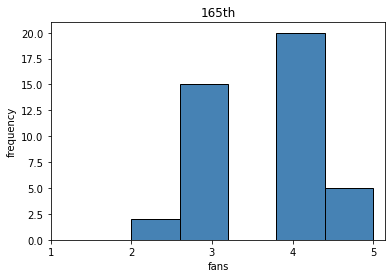

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('fans165.csv',names=['标题','up主','粉丝数'])  # 165期

title_week = data['标题']
fans = data['粉丝数']

for i in range(0,42):
    if '万' in fans[i]:
        fans[i] = float(fans[i].strip('万'))
    else:
        fans[i] = float(fans[i])/10000

for j in range(0,42):
    if fans[j]<=1:
        fans[j]=1
    if 1<fans[j]<=10:
        fans[j]=2
    if 10<fans[j]<=100:
        fans[j]=3
    if 100<fans[j]<=500:
        fans[j]=4
    if fans[j]>500:
        fans[j]=5

# 绘制直方图
plt.hist(x = fans, # 指定绘图数据
         bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

# 添加x轴和y轴标签
plt.xlabel('fans')
plt.ylabel('frequency')

x=[1,2,3,4,5]                    #虚假的x值，用来等间距分割
x_index=['1','2','3','4','5']  # x 轴显示的刻度
plt.xticks(x,x_index) 
plt.title('165th')
plt.show()

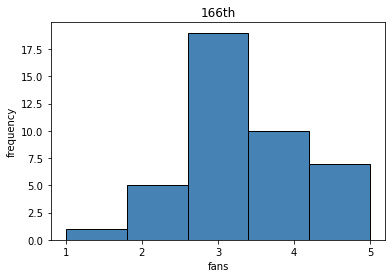

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('fans166.csv',names=['标题','up主','粉丝数'])  # 166期

title_week = data['标题']
fans = data['粉丝数']

for i in range(0,42):
    if '万' in fans[i]:
        fans[i] = float(fans[i].strip('万'))
    else:
        fans[i] = float(fans[i])/10000

for j in range(0,42):
    if fans[j]<=1:
        fans[j]=1
    if 1<fans[j]<=10:
        fans[j]=2
    if 10<fans[j]<=100:
        fans[j]=3
    if 100<fans[j]<=500:
        fans[j]=4
    if fans[j]>500:
        fans[j]=5

# 绘制直方图
plt.hist(x = fans, # 指定绘图数据
         bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

# 添加x轴和y轴标签
plt.xlabel('fans')
plt.ylabel('frequency')

x=[1,2,3,4,5]                    #虚假的x值，用来等间距分割
x_index=['1','2','3','4','5']  # x 轴显示的刻度
plt.xticks(x,x_index) 
plt.title('166th')
plt.show()

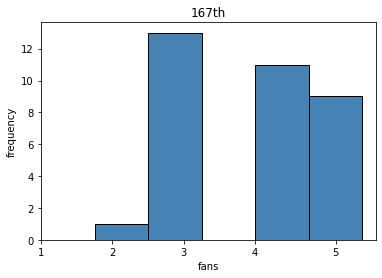

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('fans167.csv',names=['标题','up主','粉丝数'])  # 167期

title_week = data['标题']
fans = data['粉丝数']

for i in range(0,34):
    if '万' in fans[i]:
        fans[i] = float(fans[i].strip('万'))
    else:
        fans[i] = float(fans[i])/10000

for j in range(0,34):
    if fans[j]<=1:
        fans[j]=1
    if 1<fans[j]<=10:
        fans[j]=2
    if 10<fans[j]<=100:
        fans[j]=3
    if 100<fans[j]<=500:
        fans[j]=4
    if fans[j]>500:
        fans[j]=5

# 绘制直方图
plt.hist(x = fans, # 指定绘图数据
         bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

# 添加x轴和y轴标签
plt.xlabel('fans')
plt.ylabel('frequency')

x=[1.4,2.2,3,3.8,4.7]             # 虚假的x值，用来等间距分割
x_index=['1','2','3','4','5']     # x轴显示的刻度
plt.xticks(x,x_index) 
plt.title('167th')
plt.show()

### 最近四期的总体情况

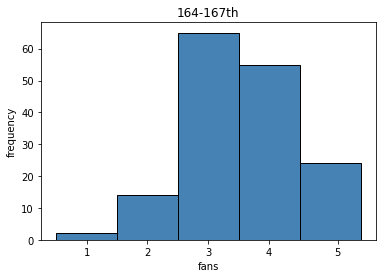

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('fans164.csv',names=['标题','up主','粉丝数'])  
data2 = pd.read_csv('fans165.csv',names=['标题','up主','粉丝数'])  
data3 = pd.read_csv('fans166.csv',names=['标题','up主','粉丝数'])  
data4 = pd.read_csv('fans167.csv',names=['标题','up主','粉丝数'])  

frames = [data1, data2, data3, data4]
df = pd.concat(frames, ignore_index=True)

title_week = df['标题']
fans = df['粉丝数']

for i in range(0,160):
    if '万' in fans[i]:
        fans[i] = float(fans[i].strip('万'))
    else:
        fans[i] = float(fans[i])/10000

for j in range(0,160):
    if fans[j]<=1:
        fans[j]=1
    if 1<fans[j]<=10:
        fans[j]=2
    if 10<fans[j]<=100:
        fans[j]=3
    if 100<fans[j]<=500:
        fans[j]=4
    if fans[j]>500:
        fans[j]=5

# 绘制直方图
plt.hist(x = fans, # 指定绘图数据
         bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

# 添加x轴和y轴标签
plt.xlabel('fans')
plt.ylabel('frequency')

x=[1.4,2.2,3,3.8,4.7]             # 虚假的x值，用来等间距分割
x_index=['1','2','3','4','5']     # x轴显示的刻度
plt.xticks(x,x_index) 
plt.title('164-167th')
plt.show()

In [142]:
fans[fans==1]

24    1
97    1
Name: 粉丝数, dtype: object

In [143]:
fans[fans==2]

3      2
9      2
13     2
15     2
25     2
30     2
59     2
69     2
99     2
107    2
109    2
114    2
123    2
142    2
Name: 粉丝数, dtype: object

In [154]:
df.loc[24]

标题     【动画毕设】《蓝骑士》
up主           二斤鬼火
粉丝数              1
Name: 24, dtype: object